
Opciones

1. Agregar datos a la base de datos

2. actualizar datos en la base de datos

3. borrar datos en la base de datos

4. leer datos de la base de datos

5. buscar datos de la base de datos

6. importar datos de la base de datos

7. exportar datos de la base de datos

8. graficar datos de la base de datos

Introduce cualquier otro número para cerrar la aplicación



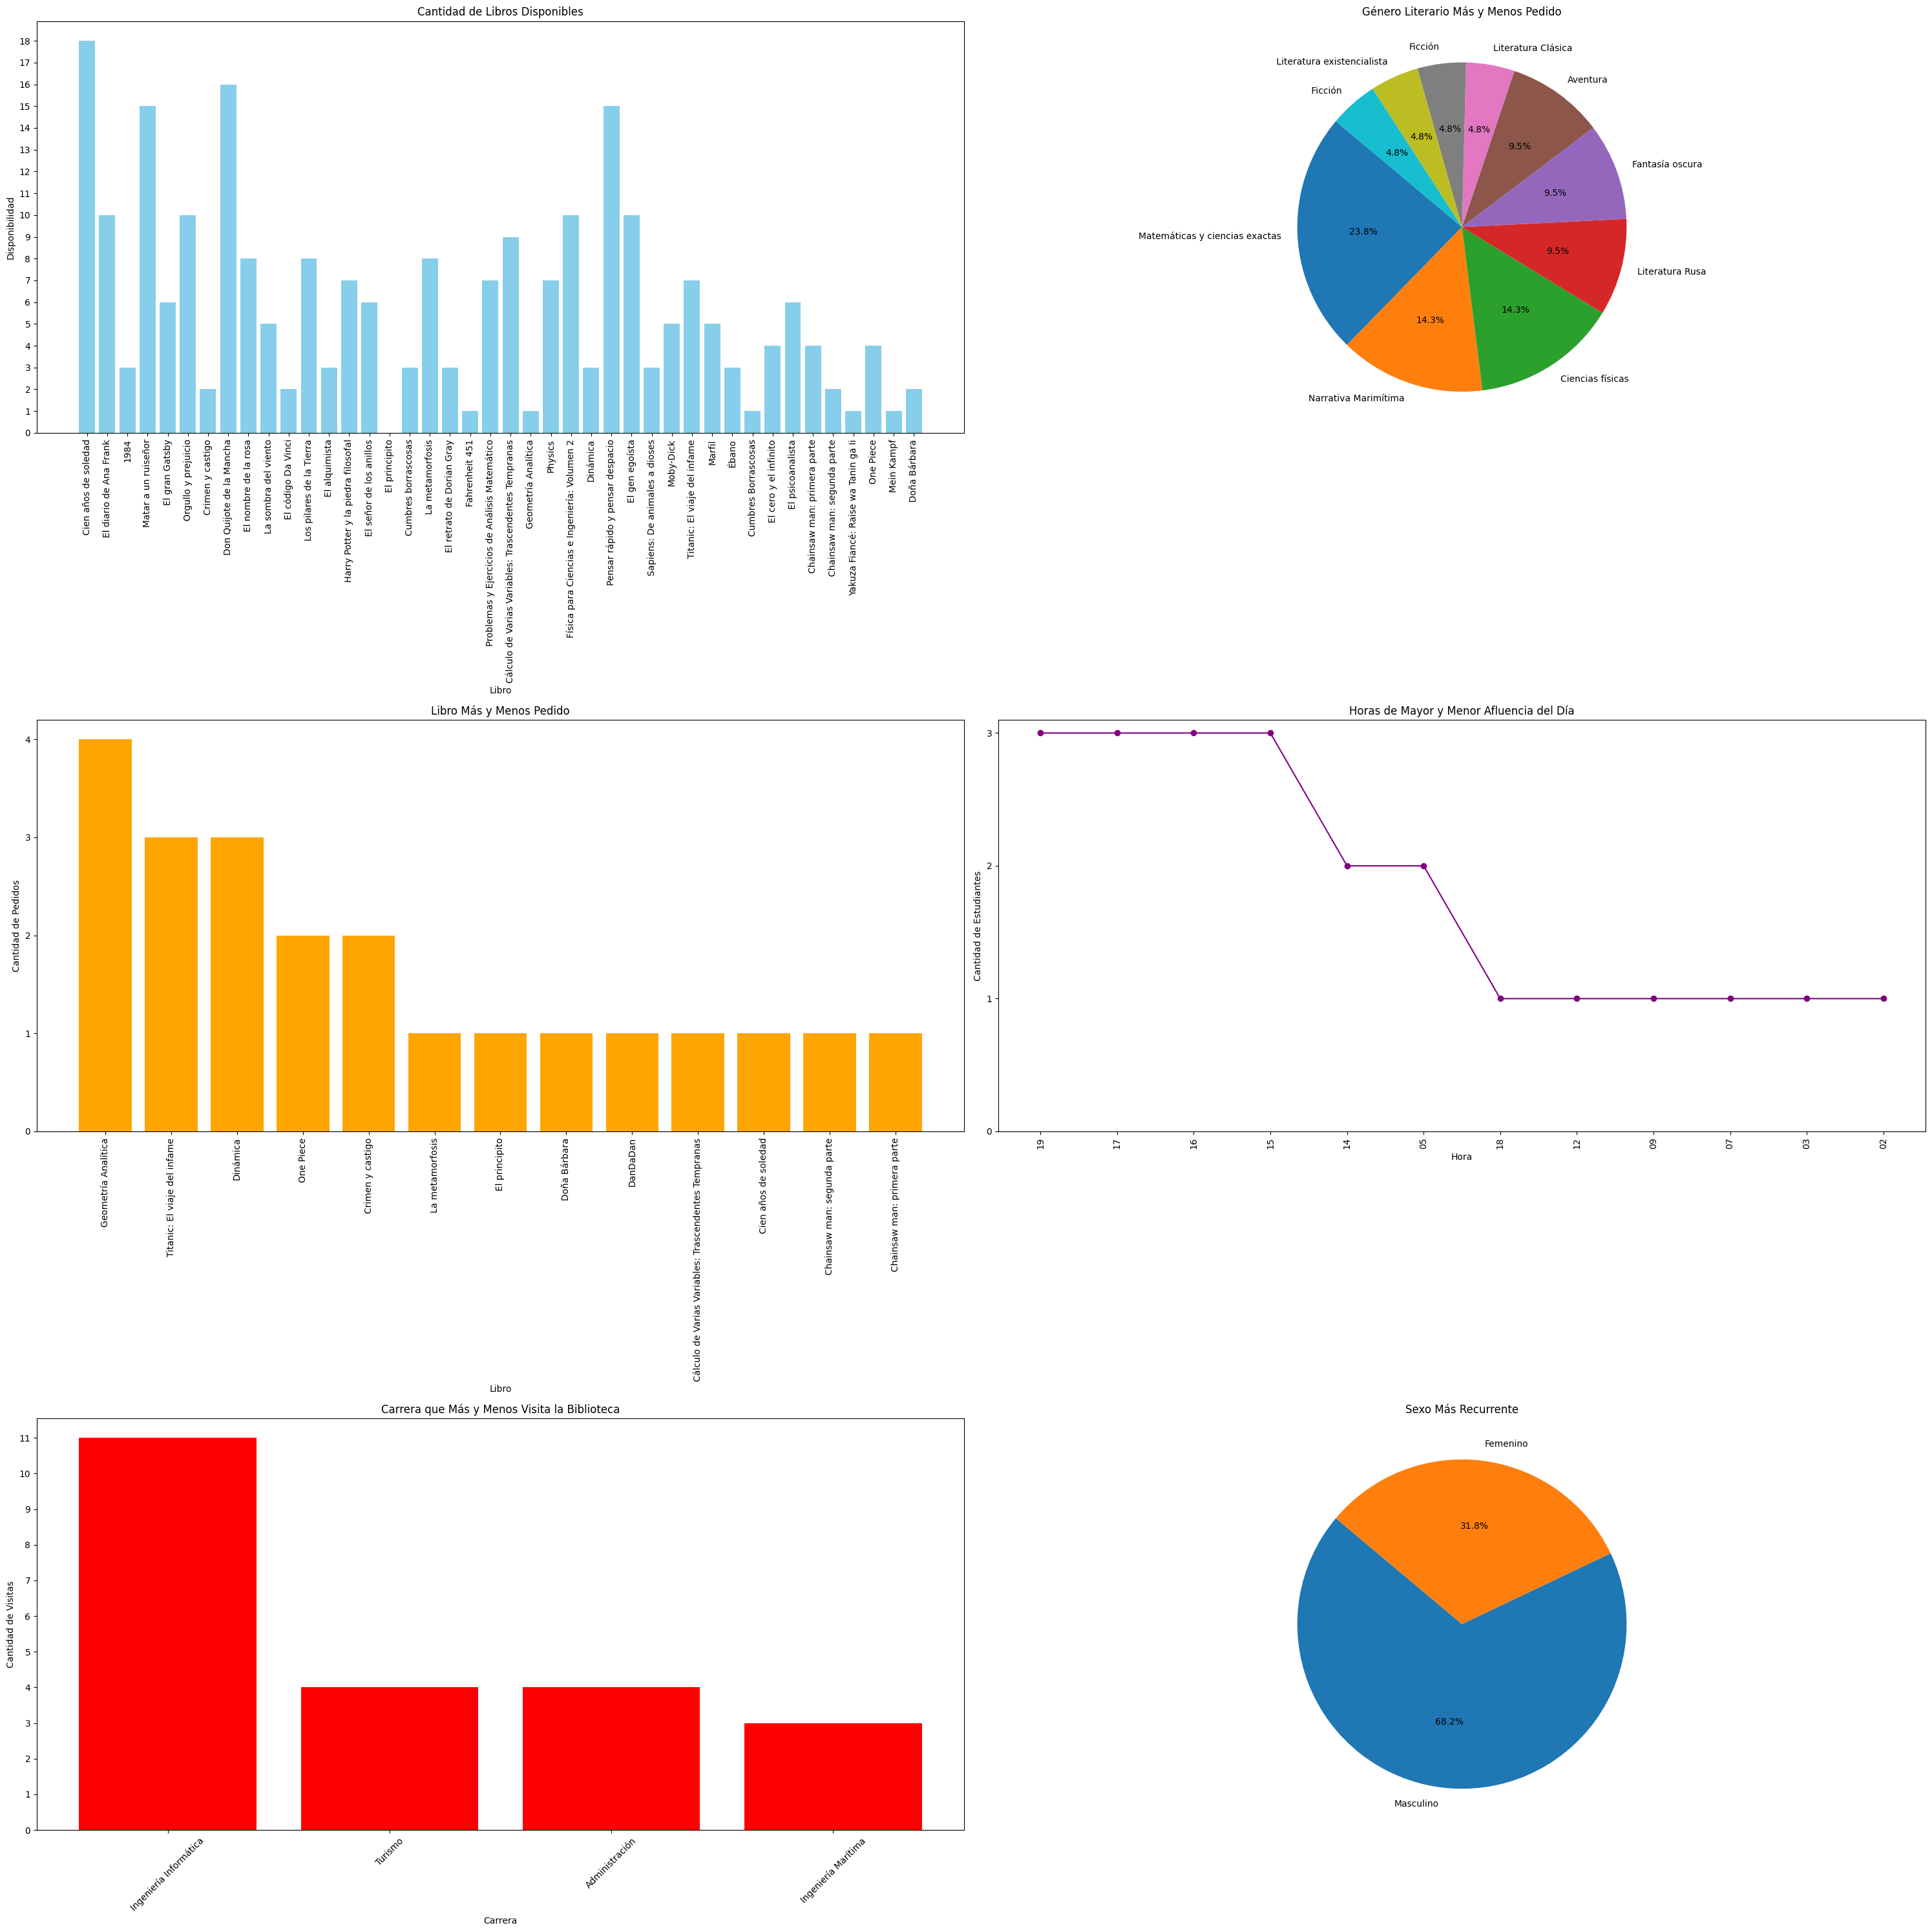


Opciones

1. Agregar datos a la base de datos

2. actualizar datos en la base de datos

3. borrar datos en la base de datos

4. leer datos de la base de datos

5. buscar datos de la base de datos

6. importar datos de la base de datos

7. exportar datos de la base de datos

8. graficar datos de la base de datos

Introduce cualquier otro número para cerrar la aplicación



In [1]:
import sqlite3 as sql
import pandas as pd
import tkinter as tk
import os
from datetime import datetime as dt, timedelta
import random
import csv
import matplotlib.pyplot as plt
import numpy as np

def createDB():
    if not os.path.exists('Registro_Bibliotecario.db'):
        try:
            conn = sql.connect('Registro_Bibliotecario.db')              #Se crea la base de datos
            print("Base de datos creada exitosamente.")
        except Exception as e:
            print(f"Error al crear la base de datos: {e}")
        finally:
            conn.close()
tablas = [ """
    CREATE TABLE IF NOT EXISTS Estudiantes (
        ID INTEGER PRIMARY KEY AUTOINCREMENT,
        Nombre TEXT NOT NULL,
        Apellido TEXT NOT NULL,
        Edad INTEGER,
        Carrera TEXT,
        Sexo TEXT,
        Semestre TEXT,
        n°_cédula INTEGER,
        Fecha_dIngreso TEXT,
        Hora_ingreso TEXT,
        Hora_salida TEXT,
        Libro_solicitado TEXT,
        FOREIGN KEY (Libro_solicitado) REFERENCES Libros(Nombre)
    );
    """
                                                                #Se crea una lista que almacene ambas tablas
    ,
    """
    CREATE TABLE IF NOT EXISTS Libros (
        ID INTEGER PRIMARY KEY AUTOINCREMENT,
        Nombre TEXT NOT NULL,
        Autor TEXT NOT NULL,
        Año_Publicación INTEGER,                          
        Género TEXT,
        Disponibilidad INTEGER,
        UNIQUE(Nombre));"""
        ]
def createTable():
    conn = sql.connect("Registro_Bibliotecario.db")              #Se crea la tabla usando un for
    cursor = conn.cursor()
    try:
        conn.execute("PRAGMA foreign_keys = ON")
        for tabla in tablas:
            cursor.execute(tabla)
            print("Las tablas se han creado exitosamente.")
    except sql.Error as e:
        print(f"Error al crear las tablas: {e}")
    finally:
        conn.commit()
        conn.close()

def insertrow(): 
    tiempo = dt.today()                                            #Función que inserta datos en cada una de las columnas
    conn = sql.connect('Registro_Bibliotecario.db')
    conn.execute("PRAGMA foreign_keys = ON")
    cursor = conn.cursor()
    Atabla = int(input('Escribe el número de la tabla la cual deseas modificar(1: Libros, 2: Estudiantes):'))
    if Atabla ==  1:
        nombre = input('Escribe el nombre del libro: ')
        autor = input('Escribe el autor del libro: ')
        año = int(input('Escribe el año de publicación del libro: '))
        genero = input('Escribe el género del libro: ')
        disponibilidad = int(input('Se encuentra disponible el Libro? (1=Disponible, 0=No Disponible): '))
        if disponibilidad == 1:
            disponibilidad = int(input('introduce la cantidades que hay disponibles del libro'))
        elif disponibilidad == 0:
            disponibilidad = 0
        else:
            print('Instrucciones: 1=Disponible, 0=No Disponible')
        cursor.execute("SELECT COUNT(*) FROM Libros WHERE Nombre LIKE ?", ('%' + nombre + '%',))
        resultado = cursor.fetchone()
        if resultado[0] > 0:
                print(f"El libro '{nombre}' ya existe en la tabla.")
        else:    
            cursor.execute("INSERT INTO Libros (ID, Nombre, Autor, Año_Publicación, Género, Disponibilidad) VALUES (?, ?, ?, ?, ?, ?)", (None,nombre,autor,año,genero, disponibilidad))
            conn.commit()
            print("Libro insertado exitosamente.")
    elif Atabla == 2:
        nombre = input('Escribe el nombre del estudiante: ')
        apellido = input('Escribe el apellido del estudiante: ')
        edad = int(input('Escribe la edad del estudiante: '))
        carrera = int(input('Seleccione la carrera del estudiannte(1: Ingeniería informática, 2: Turismo, 3: Ingeniería Marítima, 4: Administración, 5: Ingeniería Ambiental): '))
        if carrera == 1:
            carrera = 'Ingeniería Informática'
        elif carrera == 2:
            carrera = 'Turismo'
        elif carrera == 3:
            carrera = 'Ingeniería Marítima'
        elif carrera == 4:
            carrera = 'Administración'
        elif carrera == 5:
            carrera = 'Ingeniería Ambiental'
        else:
            print('Instrucciones: 1=Ingeniería Informática, 2=Turismo, 3=Ingeniería Marítima, 4=Administración, 5=Ingeniería Ambiental')
        semestre = int(input('Escribe el semestre del estudiante: '))
        cedula = input('Escribe el número de cédula del estudiante: ')
        Sexo = int(input('Escribe el sexo del estudiante (0=Masculino, 1=Femenino): '))
        if Sexo == 0:
            Sexo = 'Masculino'
        elif Sexo == 1:
            Sexo = 'Femenino'
        else:
            print('Instrucciones: 0=Masculino, 1=Femenino')
        horas_ale = random.randint(1, 24)
        horas_aleatorias = random.randint(1, 3)
        fecha_ingreso = tiempo.date()
        fecha_ingreso1 = fecha_ingreso + timedelta(days=horas_aleatorias)
        hora_ingreso = dt.now()
        hora1sum = hora_ingreso + timedelta(hours=horas_ale)
        horaing = hora1sum.strftime("%H:%M:%S")
        hora_salida_dt = hora1sum + timedelta(hours=horas_aleatorias)
        hora_salida = hora_salida_dt.strftime('%H:%M:%S')
        libro_solicitado = str(input('Escribe el libro solicitado por el estudiante: '))
        cursor.execute("SELECT Count(*) FROM Estudiantes WHERE Nombre LIKE ?", ('%' + nombre + '%',))
        cursor.execute("SELECT Nombre FROM Libros WHERE Nombre LIKE ?", ("%" + libro_solicitado + "%",))
        resultado1 = cursor.fetchone() 
        if resultado1[0] == 0: 
            print(f"El libro '{libro_solicitado}' no existe en la tabla Libros.") 
            conn.close() 
            return 
        cursor.execute("SELECT Disponibilidad FROM Libros WHERE Nombre LIKE ?", ('%' + libro_solicitado + '%',))
        resultado2 = cursor.fetchone()
        if resultado2[0] == 0 or resultado2 is False:
            print(f"El libro '{libro_solicitado}' no está disponible.")
            conn.close()
            return
        try:
            cursor.execute(''' INSERT INTO Estudiantes (ID, Nombre, Apellido, Edad, Carrera, Semestre, n°_cédula, Fecha_dIngreso, Hora_ingreso, Hora_salida, Libro_solicitado, Sexo) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?) ''', (None, nombre, apellido, edad, carrera, semestre, cedula, fecha_ingreso1, horaing, hora_salida, resultado1[0], Sexo)) 
            cursor.execute("SELECT * FROM Estudiantes ORDER BY Hora_ingreso ASC")
            cursor.execute("UPDATE Libros SET Disponibilidad = Disponibilidad - 1 WHERE Nombre LIKE ?", ('%' + libro_solicitado + '%',))
            conn.commit()
            conn.close()
            print("Estudiante agregado exitosamente.")
        except sql.IntegrityError as e: 
                print("Error al agregar el estudiante:",e)
        finally: 
            conn.close()

def search():                                     #buscar datos en cada una de las filas
    conn = sql.connect('Registro_Bibliotecario.db')
    conn.execute("PRAGMA foreign_keys = ON")
    cursor = conn.cursor()
    opcion = int(input('Selecciona una tabla para realizar la búsqueda(1=Libros, 2=Estudiantes): '))
    if opcion == 1:
        instruccion = f"SELECT * FROM Libros WHERE Nombre like  '%{input('Escribe el nombre del libro: ')}%'"
    elif opcion == 2:
        instruccion = f"SELECT * FROM Estudiantes WHERE n°_cédula like  '%{input('Escribe el nombre del estudiante: ')}%'"
    else:
        print('Instrucciones: 1=Libros, 2=Estudiantes')
        conn.close()
        return
    cursor.execute(instruccion)
    datos = cursor.fetchall()
    conn.commit()
    conn.close()
    print(datos)
def updateField():                                #actualizar filas
    conn = sql.connect('Registro_Bibliotecario.db', timeout=10)
    conn.execute("PRAGMA foreign_keys = ON")
    cursor = conn.cursor()
    opcion = int(input('Escribe la tabla a actualizar(1=Libros, 2=Estudiantes): '))
    if opcion == 1:
        name = input('Escribe el nombre del libro: ')
        instruccion = f"UPDATE Libros SET Nombre = ?, Autor = ?, Año_Publicación = ?, Género = ? WHERE Nombre like  '%{name}%'"
        cursor.execute(instruccion, (input('Escribe el nuevo nombre del libro: '), input('Escribe el nuevo autor del libro: '), input('Escribe el nuevo año de publicación del libro: '), input('Escribe el nuevo género del libro: ')))
        inst2 = f"UPDATE Libros Set Disponibilidad = ? WHERE Nombre like '%{name}%'"
        disp = int(input("el libro se encuentra disponible? (1=Disponible, 0=No Disponible): "))
        if disp == 1:
            disp = int(input('Introduce las cantidades que contiene el libro:'))
        elif disp == 0:
            disp = 0
        else:
            print('Instrucciones: 1=Disponible, 0=No Disponible')
        cursor.execute(inst2, (disp,))
        conn.commit()
        conn.close()
        print("Datos actualizados exitosamente.")
    elif opcion == 2:
        ced = input('Introduce la cédula del estudiante a modificar:')
        instruccion = f"UPDATE Estudiantes SET Nombre = ?, Apellido = ?, Edad = ?, Semestre = ?, n°_cédula = ? where n°_cédula = {ced}"
        cursor.execute(instruccion, (input('Escribe el nuevo nombre del estudiante: '), input('Escribe el nuevo apellido del estudiante: '), input('Escribe la nueva edad del estudiante: '), input('Escribe el semestre del estudiante: '), input('Escribe el nuevo número de cédula del estudiante: ')))
        conn.commit()
        career = int(input('Introduce la nueva carrera(1. Ingeniería Informática, 2. Ingeniería Ambiental, 3. Ingeniería Marítima, 4. Turismo, 5. Administración):'))
        if career == 1:
            career = 'Ingeniería Informática'
        elif career == 2:
            career = 'Ingeniería Ambiental'
        elif career == 3:
            career = 'Ingeniería Marítima'
        elif career == 4:
            career = 'Turismo'
        elif career == 5:
            career = 'Administración'
        else:
            print('Instrucciones: 1=Ingeniería Informática, 2=Ingeniería Ambiental, 3=Ingeniería Marítima, 4=Turismo, 5=Administración')
        instruccion = f"UPDATE Estudiantes SET Carrera = ? WHERE n°_cédula = {ced}"
        cursor.execute(instruccion, (career,))
        conn.commit()
        print("Datos actualizados exitosamente.")
        sex = int(input('Escribe el nuevo sexo del estudiante (0=Masculino, 1=Femenino): '))
        if sex == 0:
            sex = 'Masculino'
        elif sex == 1:
            sex = 'Femenino'
        else:
            print('Instrucciones: 0=Masculino, 1=Femenino')
        instruccion = f"UPDATE Estudiantes SET Sexo = ? WHERE n°_cédula = {ced}"
        cursor.execute(instruccion, (sex,))
        conn.commit()
        libro_sol1 = input('Escribe el nuevo libro solicitado por el estudiante: ')
        cursor.execute("SELECT Nombre FROM Libros WHERE Nombre LIKE ?", ("%" + libro_sol1 + "%",))
        resultado1 = cursor.fetchone() 
        if resultado1 is None: 
            print(f"El libro '{libro_sol1}' no existe en la tabla Libros.") 
            conn.close() 
            return
        cursor.execute("SELECT Libro_solicitado FROM Estudiantes WHERE n°_cédula = ?", (ced,))
        libro_anterior = cursor.fetchone()
        if libro_anterior is None:
            print(f"El estudiante con la cédula '{ced}' no existe en la tabla Estudiantes.")
            conn.close()
            return
        try:
            cursor.execute("UPDATE Libros SET Disponibilidad = Disponibilidad + 1 WHERE LOWER(Nombre) LIKE ?", ("%" + libro_anterior[0].lower() + "%",))
            cursor.execute("SELECT Disponibilidad FROM Libros WHERE Nombre LIKE ?", ("%" + libro_sol1 + "%",))
            disponibilidad_nuevo_libro = cursor.fetchone()
            if disponibilidad_nuevo_libro is None or disponibilidad_nuevo_libro[0] <= 0:
                print(f"El libro '{libro_sol1}' no está disponible.")
                cursor.execute("UPDATE Libros SET Disponibilidad = Disponibilidad - 1 WHERE LOWER(Nombre) LIKE ?", ("%" + libro_anterior[0].lower() + "%",))
                conn.commit()
                conn.close() 
                return
            cursor.execute("UPDATE Libros SET Disponibilidad = Disponibilidad - 1 WHERE LOWER(Nombre) LIKE ?", ("%" + libro_sol1 + "%",))
            instruccion = "UPDATE Estudiantes SET Libro_solicitado = ? WHERE n°_cédula LIKE ?"
            cursor.execute(instruccion, (resultado1[0], ced))
            print("Datos actualizados exitosamente.")
            conn.commit()
        finally:
            conn.commit()
            conn.close()
    else:
        print('Instrucciones: 1=Libros, 2=Estudiantes')
def deleterow():                                  #borrar filas
    conn = sql.connect('Registro_Bibliotecario.db')
    cursor = conn.cursor()
    opcion = int(input('Escribe la opción de borrado(1=Libros, 2=Estudiantes): '))
    if opcion == 1:
        instruccion = f"DELETE FROM Libros WHERE Nombre like  '%{input('Escribe el nombre del libro: ')}%'"
    elif opcion == 2:
        instruccion = f"DELETE FROM Estudiantes WHERE n°_cédula = {input('Escribe la cédula del estudiante: ')}%'"
    else:
        print('Instrucciones: 1=Libros, 2=Estudiantes')
    cursor.execute(instruccion)
    conn.commit()
    conn.close()
def leerpd():                                     #convertir y leer en pd
    conn = sql.connect('Registro_Bibliotecario.db') 
    opcion = int(input('Escribe la opción de lectura(1=Libros, 2=Estudiantes): '))
    if opcion == 1:
        conn = sql.connect('Registro_Bibliotecario.db')
        df = pd.read_sql_query("SELECT * FROM Libros", conn)
        print(df.head())
    elif opcion == 2:
        df = pd.read_sql_query("SELECT * FROM Estudiantes", conn)
        print(df.head())
    else:
        print('Instrucciones: 1=Libros, 2=Estudiantes')
    conn.close()
def exportartodo(nombrebd):
    conn = sql.connect(nombrebd)
    cursor = conn.cursor()
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tablas = cursor.fetchall()
    for tabla in tablas:
        nombre_tabla = tabla[0]
        print(f"Exportando tabla: {nombre_tabla}")
        cursor.execute(f"SELECT * FROM {nombre_tabla}")
        datos = cursor.fetchall()
        cursor.execute(f"PRAGMA table_info({nombre_tabla})")
        columnas = [columna[1] for columna in cursor.fetchall()]
        nombre_csv = f"{nombre_tabla}.csv"
        with open(nombre_csv, mode='w', newline='', encoding='utf-8') as archivo_csv:
            escritor = csv.writer(archivo_csv)
            escritor.writerow(columnas) 
            escritor.writerows(datos)   
        print(f"Tabla '{nombre_tabla}' exportada a '{nombre_csv}'.")
    conn.close()
    print("Exportación completada.")
def docatable():
    print('Qué tabla desea importarle datos?\n')
    print('1. Libros\n')
    print('2. Estudiantes\n')
    tabla = int(input('Escribe la opción deseada: '))
    if tabla == 1:
        tabla = 'Libros'
    elif tabla == 2:
        tabla = 'Estudiantes'
    else:
        print('Instrucciones: 1=Libros, 2=Estudiantes')
    if tabla == 'Libros':
        archivo = input('Escribe el nombre del archivo csv(asegurate de terminar en .csv): ')
        df = pd.read_csv(archivo)
        conn = sql.connect('Registro_Bibliotecario.db')
        df.to_sql('Libros', conn, if_exists='append', index = False)
        query = "SELECT * FROM libros"
        df_db = pd.read_sql(query, conn)
        print(df_db)
        conn.close()
    elif tabla == 'Estudiantes':
        archivo = input('Escribe el nombre del archivo csv(asegurate de terminar en .csv): ')
        df = pd.read_csv(archivo)
        conn = sql.connect('Registro_Bibliotecario.db')
        df.to_sql('Estudiantes', conn, if_exists='append', index = False)
        query = "SELECT * FROM estudiantes"
        df_db = pd.read_sql(query, conn)
        print(df_db)
        conn.close()
    else:
        print('Error en la ejecución, por favor, asegurese de haber ingresado las instrucciones correctamente.')
if not os.path.exists('Registro_Bibliotecario.db'):
    createDB()
    createTable()
else:
    pass
def Graphs():
    conn = sql.connect('Registro_Bibliotecario.db')
    query_disponibles = "SELECT Nombre, Disponibilidad FROM Libros"  #Aquí se consulta la cantidad de libros disponibles
    df_disponibles = pd.read_sql_query(query_disponibles, conn)
    
    # en query_generos se consulta el genero literario más pedido y menos pedido
    query_generos = """
    SELECT Género, COUNT(*) as cantidad 
    FROM Estudiantes 
    JOIN Libros ON Estudiantes.Libro_solicitado = Libros.Nombre 
    GROUP BY Género 
    ORDER BY cantidad DESC
    """
    df_generos = pd.read_sql_query(query_generos, conn)
    #EN query_libros se consulta el libro más y menos pedido
    query_libros = """
    SELECT Libro_solicitado, COUNT(*) as cantidad 
    FROM Estudiantes 
    GROUP BY Libro_solicitado 
    ORDER BY cantidad DESC
    """
    df_libros = pd.read_sql_query(query_libros, conn)
    #en query_afluencia se consulta las horas de mayor y menor afluencia del día
    query_afluencia = """
    SELECT strftime('%H', Hora_ingreso) as hora, COUNT(*) as cantidad 
    FROM Estudiantes 
    GROUP BY hora 
    ORDER BY cantidad DESC
    """
    df_afluencia = pd.read_sql_query(query_afluencia, conn)
    
    #en query_carreras se consulta la carrera que más y menos visita la biblioteca
    query_carreras = """
    SELECT Carrera, COUNT(*) as cantidad 
    FROM Estudiantes 
    GROUP BY Carrera 
    ORDER BY cantidad DESC
    """
    df_carreras = pd.read_sql_query(query_carreras, conn)
    
    #en query_sexo se consulta el sexo más y menos visitado en la biblioteca
    query_sexo = """
    SELECT Sexo, COUNT(*) as cantidad 
    FROM Estudiantes 
    GROUP BY Sexo 
    ORDER BY cantidad DESC
    """
    df_sexo = pd.read_sql_query(query_sexo, conn)
    conn.close()
    # Se crea una figura de 30x30
    plt.figure(figsize=(30, 30))
    #Gráfica de la cantidad de libros disponibles
    plt.subplot(3, 2, 1)
    plt.bar(df_disponibles['Nombre'], df_disponibles['Disponibilidad'], color='skyblue')
    plt.xlabel('Libro')
    plt.ylabel('Disponibilidad')
    plt.title('Cantidad de Libros Disponibles')
    plt.xticks(rotation=90)
    plt.yticks(np.arange(0, max(df_disponibles['Disponibilidad']) + 1,1))
    #Gráfica del género literario más y menos pedido
    plt.subplot(3, 2, 2)
    plt.pie(df_generos['cantidad'], labels=df_generos['Género'], autopct='%1.1f%%', startangle=140)
    plt.title('Género Literario Más y Menos Pedido')
    #Gráfica del libro más y menos pedido
    plt.subplot(3, 2, 3)
    plt.bar(df_libros['Libro_solicitado'], df_libros['cantidad'], color='orange')
    plt.xlabel('Libro')
    plt.ylabel('Cantidad de Pedidos')
    plt.title('Libro Más y Menos Pedido')
    plt.xticks(rotation=90)
    plt.yticks(np.arange(0, max(df_libros['cantidad']) + 1, 1))
    #Gráfica de las horas de mayor y menor afluencia del día
    plt.subplot(3, 2, 4)
    plt.plot(df_afluencia['hora'], df_afluencia['cantidad'], marker='o', linestyle='-', color='purple')
    plt.xlabel('Hora')
    plt.ylabel('Cantidad de Estudiantes')
    plt.title('Horas de Mayor y Menor Afluencia del Día')
    plt.xticks(rotation=90)
    plt.yticks(np.arange(0, max(df_afluencia['cantidad']) + 1, 1))
    #Gráfica de la carrera que más y menos visita la biblioteca
    plt.subplot(3, 2, 5)
    plt.bar(df_carreras['Carrera'], df_carreras['cantidad'], color='red')
    plt.xlabel('Carrera')
    plt.ylabel('Cantidad de Visitas')
    plt.title('Carrera que Más y Menos Visita la Biblioteca')
    plt.xticks(rotation=45)
    plt.yticks(np.arange(0, max(df_carreras['cantidad']) + 1, 1))
    #Gráfica del sexo más y menos visitado en la biblioteca
    plt.subplot(3, 2, 6)
    plt.pie(df_sexo['cantidad'], labels=df_sexo['Sexo'], autopct='%1.1f%%', startangle=140)
    plt.title('Sexo Más Recurrente')
    plt.tight_layout()
    plt.show()


while True:
    print()
    print('Opciones\n')
    print('1. Agregar datos a la base de datos\n')
    print('2. actualizar datos en la base de datos\n')
    print('3. borrar datos en la base de datos\n')
    print('4. leer datos de la base de datos\n')
    print('5. buscar datos de la base de datos\n')
    print('6. importar datos de la base de datos\n')
    print('7. exportar datos de la base de datos\n')
    print('8. graficar datos de la base de datos\n')
    print('Introduce cualquier otro número para cerrar la aplicación\n')
    opcion = int(input('Escribe la opción deseada: '))
    if opcion == 1:
        insertrow()
    elif opcion == 2:
        updateField()
    elif opcion == 3:
        deleterow()
    elif opcion == 4:
        leerpd()
    elif opcion == 5:
        search()
    elif opcion == 6:
        docatable()
    elif opcion == 7:
        exportartodo('Registro_Bibliotecario.db')
    elif opcion == 8:
        Graphs()
    else:
        break
